In [293]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('../Data/Churn_Modelling_clean.csv')

In [75]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
c_clean = df[df['CreditScore']<850]

In [77]:
c_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

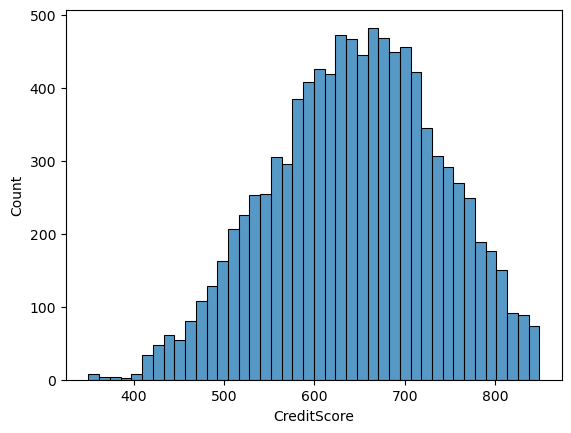

In [78]:
sns.histplot(c_clean['CreditScore'])

In [79]:
final = pd.get_dummies(c_clean)

In [80]:
final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1


In [81]:
X = final.drop('Exited',axis=1)
y = final['Exited']

In [82]:
re_X,re_y = SMOTEENN(random_state=1).fit_resample(X,y)

In [83]:
scaler = StandardScaler()
scaler.fit(re_X)
scaled_X_train = scaler.transform(re_X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_train,re_y,random_state=1)

In [198]:
y_train.value_counts()

1    2599
0    2125
Name: Exited, dtype: int64

In [340]:
def ml(max_depth):
    model = RandomForestClassifier(random_state=1,max_depth=20,criterion='entropy',n_estimators = 70,max_samples=2800,max_features=13)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = accuracy_score(pred,y_test)
    report = classification_report(pred,y_test,output_dict=False)
    return [score,report,pred,model]

## Final Model

In [341]:
[score_m, report_m, pred_m,model_m] = ml(13)

In [342]:
score_m

0.8977777777777778

In [343]:
print(report_m)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       725
           1       0.90      0.92      0.91       850

    accuracy                           0.90      1575
   macro avg       0.90      0.90      0.90      1575
weighted avg       0.90      0.90      0.90      1575



In [344]:
importances = model_m.feature_importances_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Balance'),
  Text(2, 0, 'IsActiveMember'),
  Text(3, 0, 'EstimatedSalary'),
  Text(4, 0, 'CreditScore'),
  Text(5, 0, 'Geography_France'),
  Text(6, 0, 'Geography_Spain'),
  Text(7, 0, 'NumOfProducts'),
  Text(8, 0, 'Geography_Germany'),
  Text(9, 0, 'Tenure'),
  Text(10, 0, 'Gender_Female'),
  Text(11, 0, 'Gender_Male'),
  Text(12, 0, 'HasCrCard')])

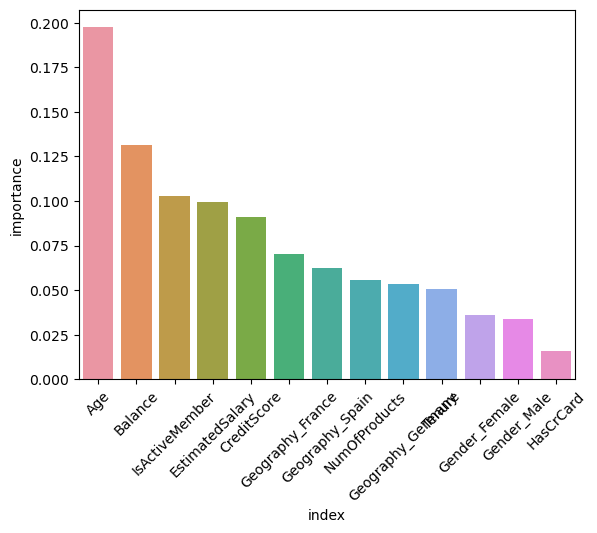

In [390]:
feature_names = [X.columns.to_list()]
forest_importances = pd.DataFrame({'index':feature_names[0],'importance':importances})
s_forest_importances = forest_importances.sort_values(by=['importance'],ascending=False)
sns.barplot(data=s_forest_importances,x='index',y='importance')
plt.xticks(rotation=45)

## Resample, Scaling, Split

In [54]:
#scale,split,resample
print(record[0][1])

              precision    recall  f1-score   support

           0       0.57      0.93      0.71      1193
           1       0.83      0.32      0.46      1249

    accuracy                           0.62      2442
   macro avg       0.70      0.63      0.58      2442
weighted avg       0.70      0.62      0.58      2442



In [73]:
#split,scale,resmple
print(record[0][1])

              precision    recall  f1-score   support

           0       0.45      0.94      0.61       940
           1       0.88      0.28      0.42      1502

    accuracy                           0.53      2442
   macro avg       0.66      0.61      0.52      2442
weighted avg       0.71      0.53      0.49      2442



In [90]:
#resample,scale,split
print(record[0][1])

              precision    recall  f1-score   support

           0       0.59      0.86      0.70       477
           1       0.93      0.73      0.82      1098

    accuracy                           0.77      1575
   macro avg       0.76      0.80      0.76      1575
weighted avg       0.82      0.77      0.78      1575



## Max Depth - max of splits
### Default - None

In [266]:
#max depth = 12

In [272]:
max_depth = np.arange(1,16)

In [273]:
max_depth

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [281]:
max_ml = []
for i in max_depth:
    max_ml.append(ml(i))

In [280]:
accuracy = []
recall_1 = []
f1 = []
pred_l = []

In [283]:
for i in max_ml:
    accuracy.append(i[0])
    recall_1.append(i[1]['1']['recall'])
    f1.append(i[1]['macro avg']['f1-score'])
    pred_l.append(i[2])

In [277]:
depth_df = pd.DataFrame(list(zip(accuracy,recall_1,f1)),columns=['accuracy','recall_1','f1'],index=max_depth)

<AxesSubplot:>

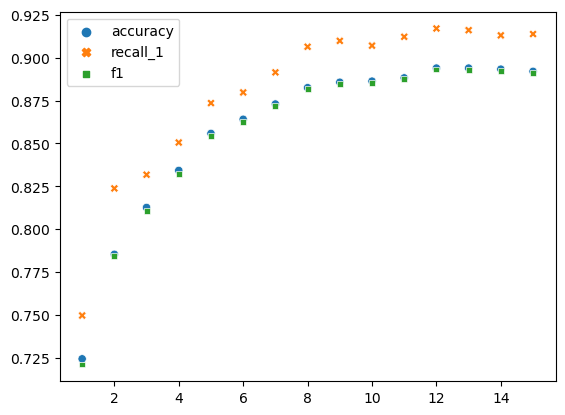

In [278]:
#max depth
sns.scatterplot(data=depth_df)

In [291]:
fpr_l =[]
tpr_l = []
thres_l= []
for i in range(len(max_depth)):
    fpr, tpr, thres = roc_curve(y_test, pred_l[i], pos_label=1)
    fpr_l.append(fpr)
    tpr_l.append(tpr)
    thres_l.append(thres)

In [292]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [295]:
color=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [300]:
NUM_COLORS=len(max_depth)
clrs = sns.color_palette('husl', n_colors=NUM_COLORS)

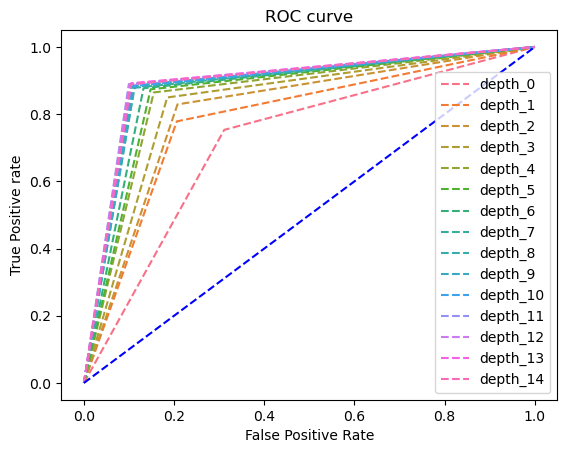

In [301]:
for i in range(len(max_depth)):
    plt.plot(fpr_l[i], tpr_l[i], linestyle='--',color=clrs[i], label=f"depth_{i}") 
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## Criterion - root node determination
### Default - gini

In [195]:
#entropy

In [145]:
criterion_l=['gini', 'entropy']
cri_ml = []
for i in criterion_l:
    cri_ml.append(ml(i))

In [146]:
accuracy = []
recall_1 = []
f1 = []

In [147]:
for i in cri_ml:
    accuracy.append(i[0])
    recall_1.append(i[1]['1']['recall'])
    f1.append(i[1]['macro avg']['f1-score'])

In [157]:
#criterion comparison
pd.DataFrame([accuracy,recall_1,f1],columns=['gini','entropy'],index=['accuracy','recall_1','f1'])

,gini,entropy
accuracy,0.904127,0.901587
recall_1,0.922535,0.927208
f1,0.903273,0.900870


## N Estimator = # of Trees
### Default - 100

In [196]:
#n_estimator = 70

In [166]:
n_l = np.arange(10,210,10)

In [169]:
n_ml = []
for i in n_l:
    n_ml.append(ml(i))

In [170]:
accuracy = []
recall_1 = []
f1 = []

In [171]:
for i in n_ml:
    accuracy.append(i[0])
    recall_1.append(i[1]['1']['recall'])
    f1.append(i[1]['macro avg']['f1-score'])

In [183]:
n_df = pd.DataFrame(list(zip(accuracy,recall_1,f1)),columns=['accuracy','recall_1','f1'],index=n_l)

In [184]:
n_df.head()

,accuracy,recall_1,f1
10,0.894603,0.933579,0.894096
20,0.901587,0.929257,0.900912
30,0.895873,0.918343,0.895032
40,0.902222,0.922261,0.901386
50,0.901587,0.922170,0.900758


<AxesSubplot:>

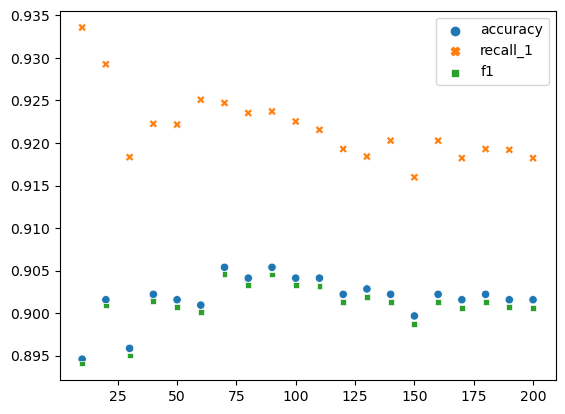

In [185]:
sns.scatterplot(data=n_df)

## Max Samples - # of samples per bootstrap
### Default - None

In [249]:
#max samples = 2800

In [244]:
sample_l = np.arange(200,4200,200)

In [245]:
sample_ml = []
for i in sample_l:
    sample_ml.append(ml(i))

In [246]:
accuracy = []
recall_1 = []
f1 = []
for i in sample_ml:
    accuracy.append(i[0])
    recall_1.append(i[1]['1']['recall'])
    f1.append(i[1]['macro avg']['f1-score'])

In [247]:
sample_df = pd.DataFrame(list(zip(accuracy,recall_1,f1)),columns=['accuracy','recall_1','f1'],index=sample_l)

<AxesSubplot:>

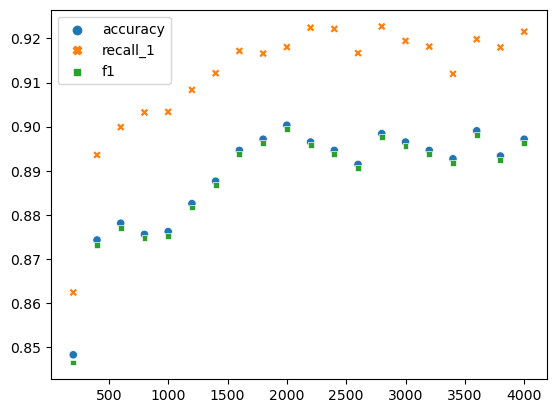

In [248]:
sns.scatterplot(data=sample_df)

## Max Features - max features per bootstrap
### Default - sqrt(n_features)

In [255]:
#max features= 9

In [215]:
X_train.shape

(4724, 13)

In [251]:
feature_l = np.arange(1,14)
feature_ml = []
for i in feature_l:
    feature_ml.append(ml(i))

In [252]:
accuracy = []
recall_1 = []
f1 = []
for i in feature_ml:
    accuracy.append(i[0])
    recall_1.append(i[1]['1']['recall'])
    f1.append(i[1]['macro avg']['f1-score'])

In [253]:
feature_df = pd.DataFrame(list(zip(accuracy,recall_1,f1)),columns=['accuracy','recall_1','f1'],index=feature_l)

<AxesSubplot:>

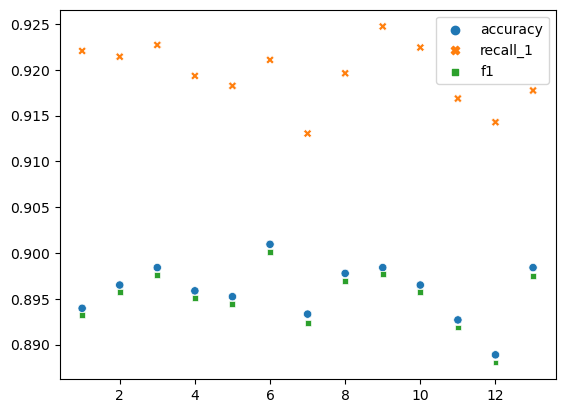

In [254]:
sns.scatterplot(data=feature_df)

In [267]:
#Add feature importance

In [268]:
#add area under curve